<a href="https://colab.research.google.com/github/moisesssantos/Data-Science/blob/main/Analisando_os_Dados_do_Airbnb%2C_Santiago%2C_Chile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise dos Dados do Airbnb - *Santiago, Chile***


<center><img alt="Analisando Airbnb" width="25%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

Mesmo sem possuir, se quer, um único hotel, a [Airbnb](https://www.airbnb.com.br/) é considerada a maior empresa hoteleira da atualidade. 

Fundada a pouco mais de 10 anos, a Starup já **hospedou mais de 1 bilhão** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Sua missão é construir uma plataforma inclusiva para cada um de seus anfitriões e hóspedes. Com isso, ela conecta hospedes com anfitriões que querem alugar seus imóveis de maneira prática e alternativa, como uma forma de proporcionar uma locação mais atrativa que as convencionais em hotéis. Além disso ainda ajuda a divulgar locais para passeios, eventos, atividades e atrações locais. 

Através do seu portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados de diversas cidades do mundo e desenvolver estudos, projetos e soluções de *Data Science*.  

**Fonte dos dados**: [Inside Airbnb](http://insideairbnb.com/get-the-data.html)

**Conjunto dos dados**: *listings.csv (acessado em 03/03/2022)*. 

**Neste *notebook*, iremos analisar os dados referentes à cidade de Santiago, e ver quais insights podem ser extraídos a partir de dados brutos.**

# **Santiago, Chile.**

Santiago, capital e maior cidade do Chile, com cerca de 5,6 milhões de habitantes é descrita como uma cidade agradável, moderna e muito charmosa. Fica em um vale cercado de montanhas e pelos Andes coberto de neve. É uma opção que tem cada vez mais atraído turistas todos os anos, sobretudo, brasileiros.

Seu clima é semelhante ao do Mediterrâneo, com temperaturas mínimas de 12 e a máxima podendo chegar aos 35 graus no verão. Entre abril e agosto, o clima muda e se sente muito frio, já que começa o Outono, e se acentua mais com o inverno. Se sua ideia for ver neve no Chile, viajar entre junho e setembro pode ser a melhor alternativa, agosto seria uma ótima pedida.

## Obtenção dos Dados

Os dados usados neste trabalho foram obtidos no site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Santiago (good for visualisations).*

Importante: O portal está em constante evolução, e em determinado momento, pode ser que o [conjunto de dados](http://data.insideairbnb.com/chile/rm/santiago/2021-12-25/visualisations/listings.csv) exato utilizado nesse notebook não esteja mais disponível, o que quebraria nosso código.

Pensando nisso, disponibilizamos [aqui](https://drive.google.com/file/d/1GWpFxheTe4ccOUrEYAa09hy54RsEHNjk/view?usp=sharing) o conjunto que utilizamos, para que você sempre consiga utilizar esse material.

Com isso em mente, vamos ao projeto.

In [1]:
# Instalando bibliotecas
!pip install geopandas
!pip install folium

     |████████████████████████████████| 1.0 MB 5.1 MB/s 
     |████████████████████████████████| 6.3 MB 27.0 MB/s 
     |████████████████████████████████| 16.7 MB 310 kB/s 


In [3]:
# Importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins
import json
import numpy as np
import geopandas as gpd
import plotly.graph_objs as go
from plotly.graph_objs import Scatter, Figure, Layout
import requests

%matplotlib inline

In [61]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/chile/rm/santiago/2021-12-25/visualisations/listings.csv')

## Análise dos Dados

No primeiro contato ao conjunto de dados, uma olhada geral em alguns registros permite ter uma idéia geral do tipo de dado, da disposição deles e da estrutura do dataset.
Nesta etapa buscamos identificar e corrigir registros inexistentes, corrompidos e/ou duvidosos no conjunto de dados para alcançarmos os resultados desejados no projeto. 

In [62]:
# Visualizar os 5 primeiros registros do conjunto de dados
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,30950,"Apartment Providencia, Santiago",132845,Pamela,NaN,Providencia,-33.43174,-70.61845,Entire home/apt,260000,180,12,2021-08-30,0.22,1,276,4,NaN
1,49392,Share my Flat in Providencia,224592,Maria,NaN,Providencia,-33.43266,-70.60072,Private room,45652,3,0,NaN,NaN,2,176,0,NaN
2,52811,Suite Providencia 1 Santiago Chile,244792,Cristián,NaN,Providencia,-33.42959,-70.61880,Entire home/apt,46513,1,46,2021-11-04,0.34,3,89,1,NaN
3,53494,depto centro ski el colorado chile,249097,Paulina,NaN,Lo Barnechea,-33.34344,-70.29432,Entire home/apt,149999,2,38,2021-05-22,0.57,1,266,1,NaN
4,55303,Plaza Lyon piso 3,261079,Hernan,NaN,Providencia,-33.42250,-70.60920,Entire home/apt,70000,2,2,2016-11-28,0.03,3,365,0,NaN


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - grupo de bairros/distritos
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias
* `number_of_reviews_ltm` - número de reviews que da propriedade nos últimos 12 meses
* `license` - licença ou registro


**Observação**:

Vale descatar que os preços da coluna 'price' acima estão em moeda local (Peso Chileno). Logo abaixo, carregamos o preço do peso chileno atualizado e convertido em real brasileiro, após aplicamos a variavél 'price'.  

In [123]:
# Atualização da cotação do peso chileno
requisicao = requests.get('https://economia.awesomeapi.com.br/all/BRL-CLP')

cotacao = requisicao.json()
cotacao

print ('Moeda: ' + cotacao['BRL']['name'])
print('Valor atual: R$' + cotacao['BRL']['bid'])

Moeda: Real Brasileiro/Peso Chileno
Valor atual: R$159.058


In [64]:
# Transformando a variavél 'price' para real
df['price']=df['price'] / float(cotacao['BRL']['bid'])

In [65]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,30950,"Apartment Providencia, Santiago",132845,Pamela,NaN,Providencia,-33.43174,-70.61845,Entire home/apt,1634.202603,180,12,2021-08-30,0.22,1,276,4,NaN
1,49392,Share my Flat in Providencia,224592,Maria,NaN,Providencia,-33.43266,-70.60072,Private room,286.940836,3,0,NaN,NaN,2,176,0,NaN
2,52811,Suite Providencia 1 Santiago Chile,244792,Cristián,NaN,Providencia,-33.42959,-70.61880,Entire home/apt,292.352560,1,46,2021-11-04,0.34,3,89,1,NaN
3,53494,depto centro ski el colorado chile,249097,Paulina,NaN,Lo Barnechea,-33.34344,-70.29432,Entire home/apt,942.802909,2,38,2021-05-22,0.57,1,266,1,NaN
4,55303,Plaza Lyon piso 3,261079,Hernan,NaN,Providencia,-33.42250,-70.60920,Entire home/apt,439.977624,2,2,2016-11-28,0.03,3,365,0,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Dando prosseguimento ao conhecimento do dataset, abaixo vemos o tamanho do mesmo e quais os tipos de variáveis existentes.

In [124]:
# Visualizar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

Entradas:	 9139
Variáveis:	 18



In [125]:
# Visualizar o tipo das variáveis
display(df.dtypes)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [68]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
round(df.isnull().sum() / df.shape[0]*100, 2).sort_values(ascending=False)

neighbourhood_group               100.00
license                            98.84
reviews_per_month                  35.66
last_review                        35.66
host_name                           0.04
name                                0.04
number_of_reviews                   0.00
number_of_reviews_ltm               0.00
availability_365                    0.00
calculated_host_listings_count      0.00
id                                  0.00
minimum_nights                      0.00
room_type                           0.00
longitude                           0.00
latitude                            0.00
neighbourhood                       0.00
host_id                             0.00
price                               0.00
dtype: float64

Conforme demonstrado acima, a variavel "*neighbourhood_group*" tem a totalidade das entradas do conjunto de dados com valores ausentes e a variável "*license*" tem mais de 98%. Demonstrado no dicionario de variáveis, elas tratam respectivamente do "grupo de bairros ou distritos" e do "numero de licença/registro do imóvel". Elas, mais a frente, serão excluida da análise por não influenciar no resultado buscado no projeto.

### **Q3. Qual o tipo de distribuição das variáveis?** 

Uma maneira que facilita muito a vizualização da distribuição das variáveis é através de um histograma, que nada mais é do que a  representação gráfica em colunas ou barras dos registros das variáveis de um conjunto de dados. Vejamos abaixo com estão distribuidos os dados das principais variáveis utilizadas no estudo.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4bf3879e50>,
      dtype=object)

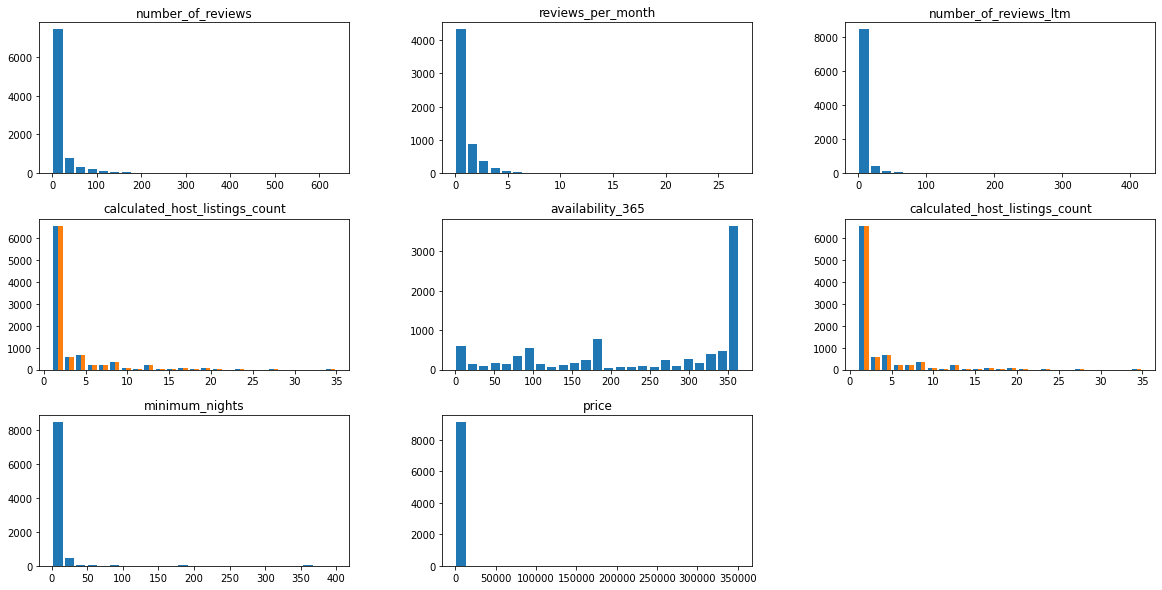

In [70]:
# Histograma das variáveis numéricas
df[["number_of_reviews", "reviews_per_month", "number_of_reviews_ltm", "calculated_host_listings_count",
    "availability_365", "calculated_host_listings_count", "minimum_nights","price"]].hist(bins=25, figsize=(20, 10),
                                                                                          layout=(3, 3), grid=False, rwidth=0.8)

Veja abaixo um resumo estatístico das variáveis

In [126]:
# Resumo estatístico das variáveis numéricas
df[["minimum_nights", "price", "number_of_reviews", "reviews_per_month", "number_of_reviews_ltm", "calculated_host_listings_count",
             "availability_365", "calculated_host_listings_count"]].describe()

,minimum_nights,price,number_of_reviews,reviews_per_month,number_of_reviews_ltm,calculated_host_listings_count,availability_365,calculated_host_listings_count
count,9139.000000,9139.000000,9139.000000,5880.000000,9139.000000,9139.000000,9139.000000,9139.000000
mean,7.251231,502.769169,17.942554,0.910160,4.292811,3.025605,248.003830,3.025605
std,26.967635,5472.783047,40.411300,1.378244,13.053941,4.312533,127.789544,4.312533
min,1.000000,0.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000
25%,1.000000,135.349688,0.000000,0.110000,0.000000,1.000000,142.000000,1.000000
50%,2.000000,219.988812,2.000000,0.400000,0.000000,1.000000,319.000000,1.000000
75%,3.000000,339.411310,16.000000,1.150000,3.000000,3.000000,364.000000,3.000000
max,400.000000,351908.761212,638.000000,27.000000,418.000000,35.000000,365.000000,35.000000


Após uma olhada nos histogramas e no resumo estátistico das variáveis podemos afirmar que a variável 'price' possui 75% dos valores abaixo de 339.08 e valor máximo de 351568.46. Esses valores discrepantes, comumente chamados de ***outliers*** distorcem os resultados, neste caso específico, altera a média dos preços.

A variável 'minimum_nights' possui registros com valores superiores a 365 dias no ano.

Vamos plotar o os *bloxplots* dessas variáveis para facilitar a vizualização dos *outliers* e mais abaixo vamos fazer a remoção dos mesmos.

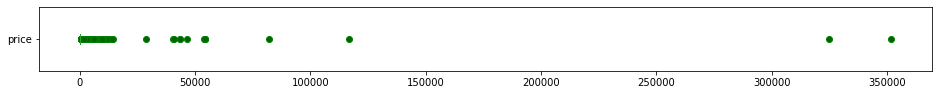

In [127]:
green_c = dict(markerfacecolor='darkgreen', marker='o', markeredgecolor='green')

# Gráfico diagrama de caixa de 'price'
df.plot(subplots=True, y=['price'], kind='box', vert=False, figsize =(16, 4), layout=(3,1), flierprops=green_c);

In [77]:
print("{} entradas para a variavel 'price' acima de 1.000.".format(len(df[df.price > 1000])))
print("{:.4f}%".format((len(df[df.price > 1000]) / df.shape[0]) *100))

572 entradas para a variavel 'price' acima de 1.000.
6.2589%


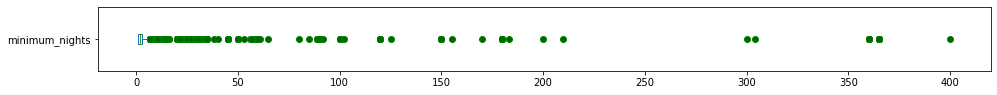

In [128]:
# Gráfico diagrama de caixa de 'minimum_nights'
df.plot(subplots=True, y=['minimum_nights'], kind='box', vert=False, figsize=(16, 4), layout=(3,1), flierprops=green_c);

In [79]:
print("{} entradas para a variavel 'minimum_nights' acima de 30.".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format(len(df[df.minimum_nights > 30]) / df.shape[0] * 100))

247 entradas para a variavel 'minimum_nights' acima de 30.
2.7027%


### Removendo os outliers

Esses valores correspondes a apenas 6.26% dos resgistros da variável price e 2.7% da variável minimum_nights

In [80]:
# Criando um novo DataFrame e removendo os outliers
dfSantiago = df.copy()

In [81]:
# Removendo os outliers das variaveis 'price' e 'minimum_nights'
dfSantiago.drop(dfSantiago[dfSantiago.price > 1000].index, axis=0, inplace=True)
dfSantiago.drop(dfSantiago[dfSantiago.minimum_nights > 30].index, axis=0, inplace=True)

In [82]:
# Removendo as colunas 'neighbourhood_group' e 'license', pois estão vazias
dfSantiago.drop(['neighbourhood_group','license'], axis=1, inplace=True)

In [129]:
# Ordenar em ordem decrescente as variáveis por seus valores ausentes apos a remoção das colunas
round(dfSantiago.isnull().sum() / dfSantiago.shape[0]*100, 2).sort_values(ascending=False)

last_review                       34.85
reviews_per_month                 34.85
name                               0.05
host_name                          0.05
id                                 0.00
host_id                            0.00
neighbourhood                      0.00
latitude                           0.00
longitude                          0.00
room_type                          0.00
price                              0.00
minimum_nights                     0.00
number_of_reviews                  0.00
calculated_host_listings_count     0.00
availability_365                   0.00
number_of_reviews_ltm              0.00
dtype: float64

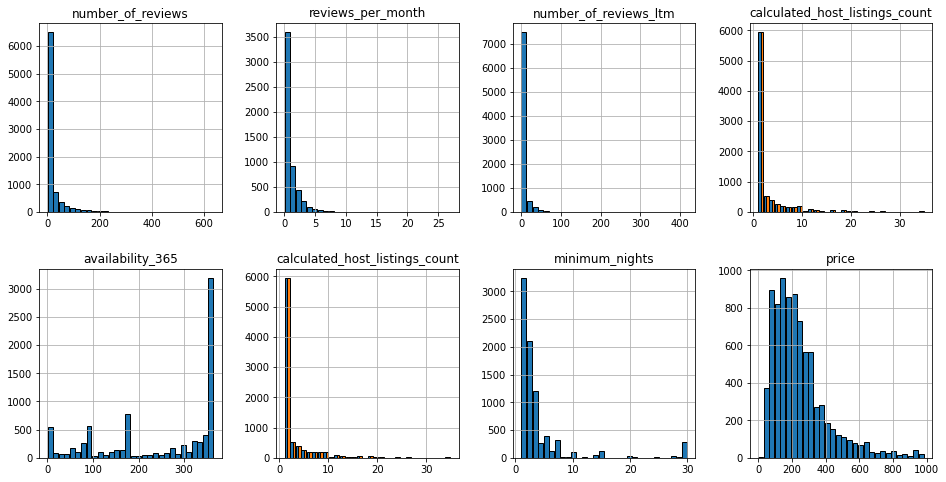

In [84]:
# Gráfico com o histograma das variáveis numéricas após a remoção dos outliers
dfSantiago[["number_of_reviews", "reviews_per_month", "number_of_reviews_ltm", "calculated_host_listings_count",
             "availability_365", "calculated_host_listings_count", "minimum_nights", "price"]].hist(bins=30, figsize=(16, 8), edgecolor='black', rwidth=0.9, layout=(2, 4));

### Correlação existente entre as variáveis

Quando existe uma semelhança ou relação entre duas coisas, pessoas ou ideias dizemos que existe um correlação e isto pode ser medido através do coeficiente de correlação. No nosso estudo, vamos vizualizar isso através de um *heatmap*, que torna o entendimento mais perceptível.

In [93]:
# Matriz de correlação
corr = dfSantiago[["number_of_reviews", "reviews_per_month", "number_of_reviews_ltm", "calculated_host_listings_count",
                   "minimum_nights", "price", "availability_365"]].corr()

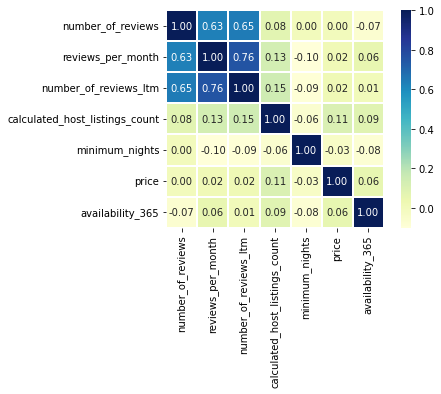

In [94]:
# Gráfico heatmap a partir das correlações
sns.heatmap(corr, cmap='YlGnBu', fmt='.2f', square=True, linewidth=1, linecolor='white', annot=True)

As variáveis 'number_of_reviews, 'reviews_per_month' e 'number_of_reviews' tem as maiores correlações, elas se referem às avaliações dos imóveis, equanto as outras têm correlação neutra ou negativa.

### **Q4. Qual a média dos preços de aluguel?**

In [85]:
# Média da coluna `price`
m_preco = round(dfSantiago["price"].mean(), 2)
print('Média de preços em Santiago por noite R$ {}'.format(m_preco))

Média de preços em Santiago por noite R$ 246.7


Após encontramos o preço médio, mostrado acima, vamos encontrar também o preço médio por tipo, da variável 'room_type', que indica o tipo de locação que está anunciada no Airbnb. Os tipos são de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Veja no gráfico abaixo.

room_type
Hotel room         379.48
Entire home/apt    305.56
Private room       168.85
Shared room        134.16
Name: price, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, ' ')

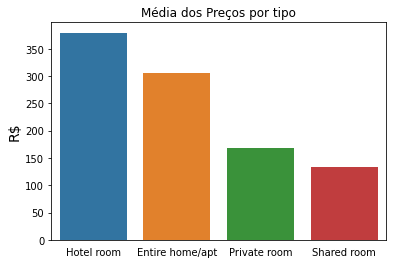

In [95]:
# Gráfico com a Média dos preços por tipo de imóvel
media_preco = round(dfSantiago.groupby('room_type').price.mean(), 2).sort_values(ascending=False)
print(media_preco)

mp = sns.barplot(media_preco.index, media_preco)
mp.set_title('Média dos Preços por tipo')
mp.tick_params(bottom=False, top=False);
mp.set_ylabel('R$', fontsize=14)
mp.set_xlabel(' ')

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [96]:
# Quantidade de cada tipo de imóvel disponível
dfSantiago.room_type.value_counts()

Entire home/apt    4662
Private room       3409
Shared room         186
Hotel room           90
Name: room_type, dtype: int64

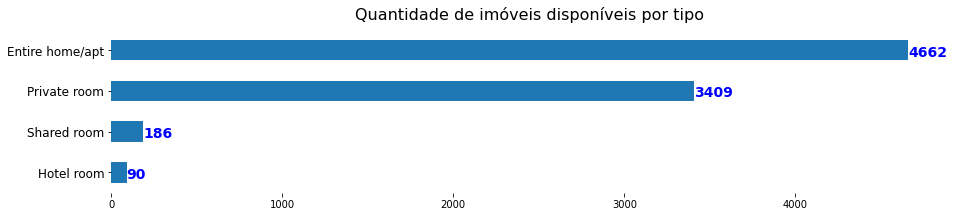

In [97]:
# Gráfico
ax = dfSantiago.room_type.value_counts().sort_values(ascending=True).plot.barh(figsize=(15, 3))

# Adicionar valores
for i in ax.patches:
    ax.text(i.get_width()+0.2, i.get_y()+0.1,
            str(round((i.get_width()), 2)),
            fontsize=14, fontweight='bold',
            color='blue')

# Formatar gráfico
ax.set_title('Quantidade de imóveis disponíveis por tipo', loc='center', pad=10, fontdict={'fontsize': 16})
ax.set_frame_on(False)
ax.tick_params(axis='y', labelsize=12)


In [101]:
# Porcentagem de cada tipo de imóvel disponível
round(dfSantiago.room_type.value_counts() / dfSantiago.shape[0] * 100, 2)

Entire home/apt    55.85
Private room       40.84
Shared room         2.23
Hotel room          1.08
Name: room_type, dtype: float64

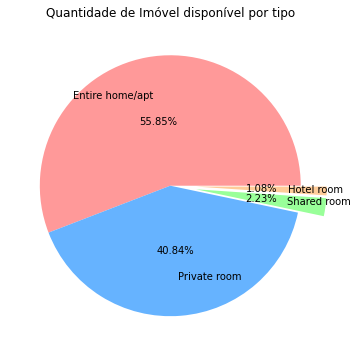

In [99]:
# Gráfico de pizza com as porcentagens por tipo
fig = plt.figure(figsize=(6, 6))
ax = dfSantiago.room_type.value_counts()
cores = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
explode = (0, 0.0, 0.2, 0.2)
lbs = 'Entire home/apt', 'Private room', 'Shared room', 'Hotel room'
plt.pie(ax, labels=lbs, autopct = '%.2f%%', colors=cores, pctdistance=0.5, labeldistance=0.7, explode=explode)
plt.title('Quantidade de Imóvel disponível por tipo')
plt.show()

### **Q6. Qual a localidade mais cara do dataset?**


Veja abaixo a relação dos bairros com média de preços a partir do mais caro. Mais abaixo em Criando o Mapa com os Bairros de Santiago, esses dados foram plotados em um gráfico interativo que facilita em muito a visualização das informações.

In [103]:
# Preços médio por bairros
bairros_caros = dfSantiago.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:]
bairros_caros

neighbourhood
Lo Espejo              613.077392
Lo Barnechea           551.451802
Vitacura               350.835898
Las Condes             318.641504
Pudahuel               289.482696
Quilicura              263.440059
Providencia            262.895911
Cerro Navia            256.755677
Huechuraba             249.393728
El Bosque              231.154816
Recoleta               224.223905
Cerrillos              220.284226
Lo Prado               219.962099
Peñalolén              218.027563
Santiago               216.839666
Estación Central       204.368929
La Florida             200.496468
Renca                  198.703037
San Miguel             196.956831
Maipú                  196.471104
Ñuñoa                  183.453237
Macul                  166.029045
Quinta Normal          155.129058
San Joaquín            149.798553
La Cisterna            146.198083
La Reina               146.151573
Independencia          142.969072
Conchalí               140.691488
La Granja              126.482253


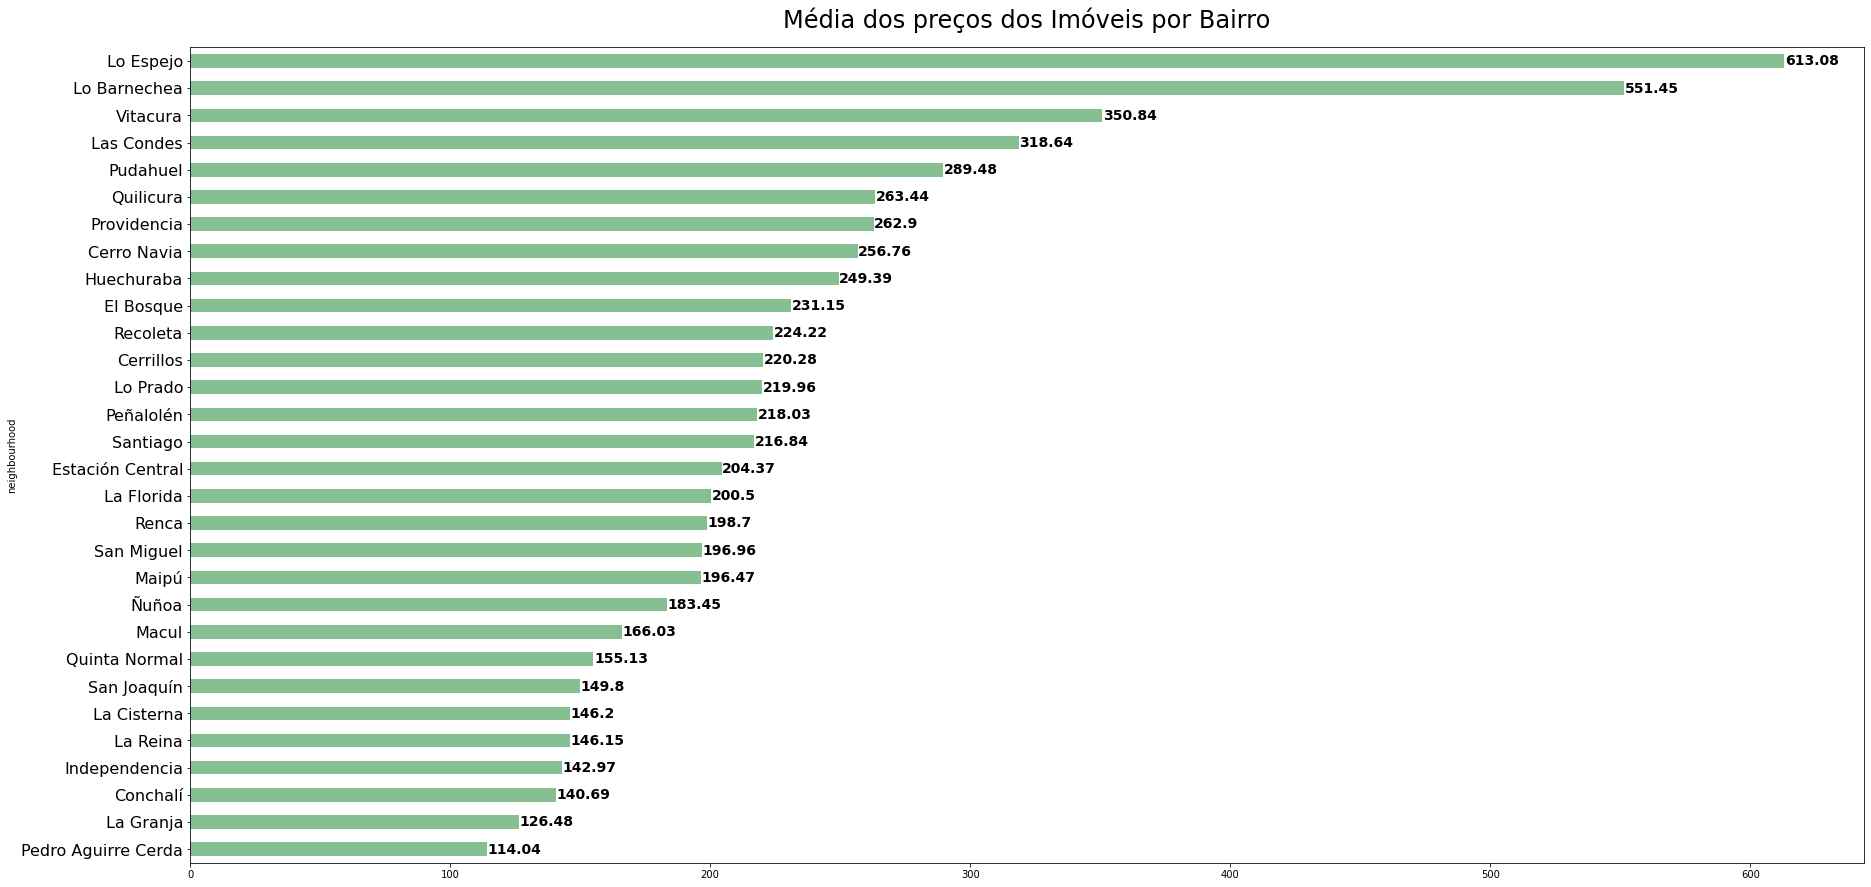

In [104]:
# Gráfico
ax = dfSantiago.groupby(['neighbourhood']).price.mean().sort_values(
    ascending=True).plot.barh(figsize=(30, 15), color='#86bf91')

# Adicionar valores
for i in ax.patches:
    ax.text(i.get_width()+0.2, i.get_y()+0.1,
            str(round((i.get_width()), 2)),
            fontsize=14, fontweight='bold',
            color='black')

# Formatar gráfico
ax.set_title('Média dos preços dos Imóveis por Bairro', loc='center', pad=20, fontdict={'fontsize': 24})
ax.tick_params(axis='y', labelsize=16)

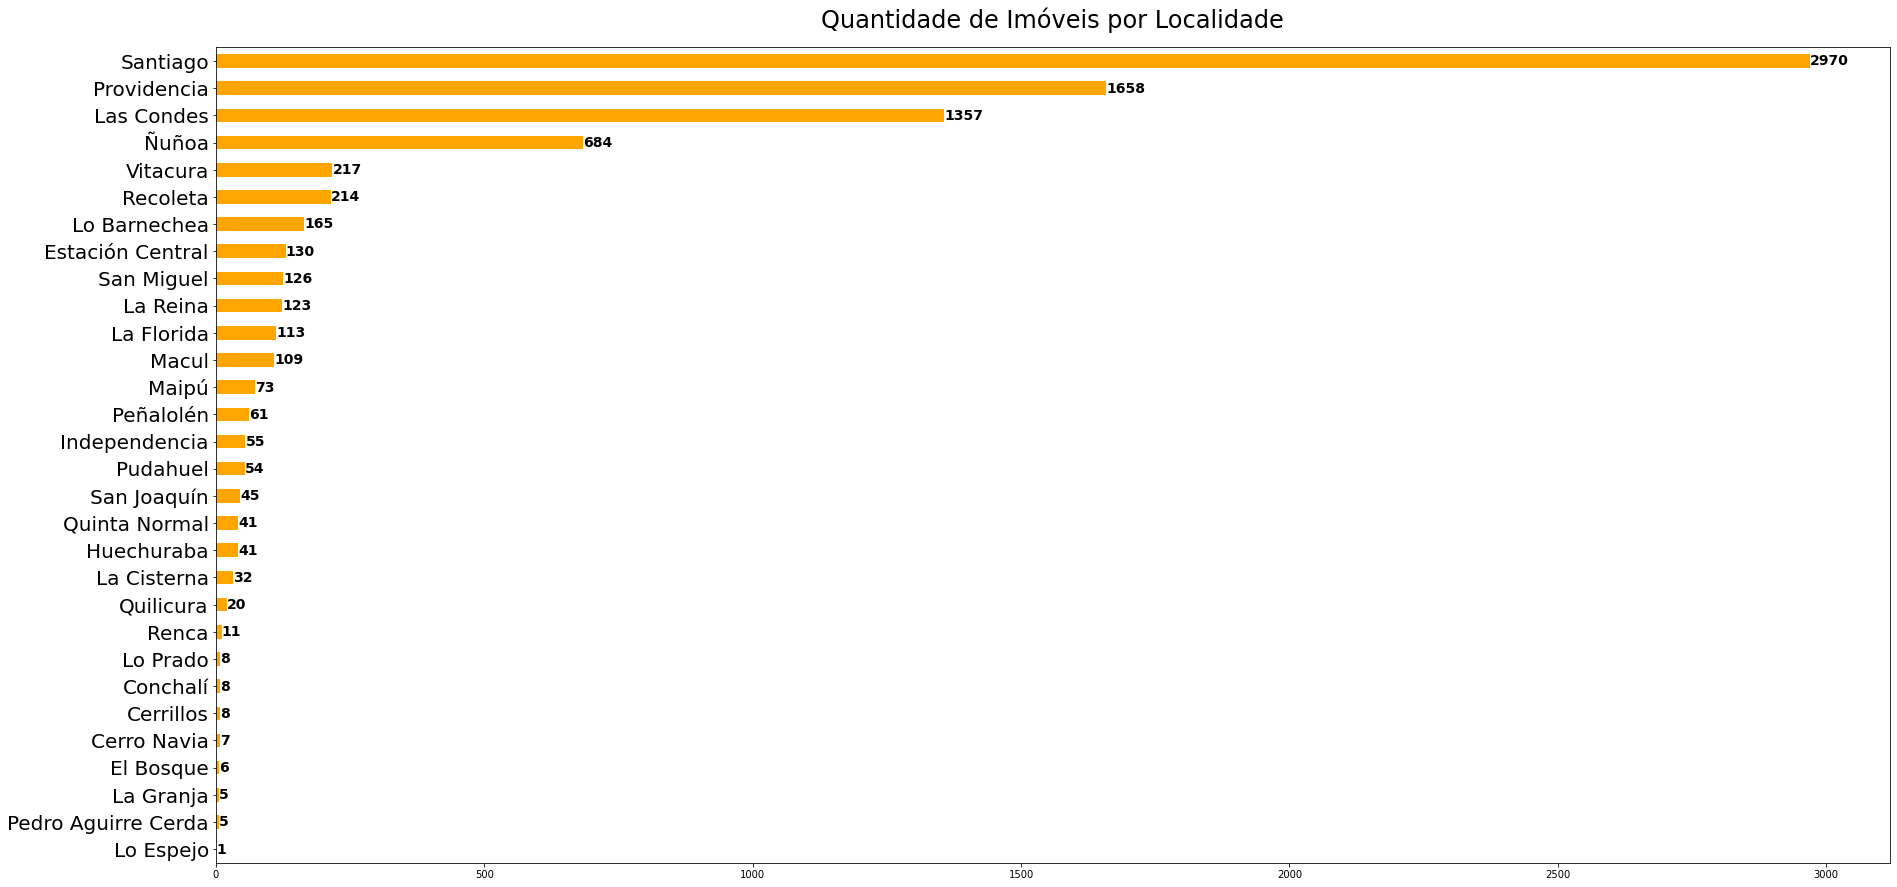

In [106]:
# Gráfico da quantiade de imóveis por bairro
ax = dfSantiago.neighbourhood.value_counts().sort_values(
    ascending=True).plot.barh(figsize=(30, 15), color='orange', y='val')

# Adicionar quantidades
for i in ax.patches:
    ax.text(i.get_width()+0.2, i.get_y()+0.1,
            str(round((i.get_width()), 2)),
            fontsize=14, fontweight='bold',
            color='black')

# Formatar gráfico
ax.set_title('Quantidade de Imóveis por Localidade', loc='center', pad=20, fontdict={'fontsize': 24})
ax.tick_params(axis='y', labelsize=20)

In [107]:
# Quantidade de Imóveis por Bairro
dfSantiago.groupby('neighbourhood')['room_type'].size().sort_values(ascending=False)

neighbourhood
Santiago               2970
Providencia            1658
Las Condes             1357
Ñuñoa                   684
Vitacura                217
Recoleta                214
Lo Barnechea            165
Estación Central        130
San Miguel              126
La Reina                123
La Florida              113
Macul                   109
Maipú                    73
Peñalolén                61
Independencia            55
Pudahuel                 54
San Joaquín              45
Huechuraba               41
Quinta Normal            41
La Cisterna              32
Quilicura                20
Renca                    11
Conchalí                  8
Cerrillos                 8
Lo Prado                  8
Cerro Navia               7
El Bosque                 6
Pedro Aguirre Cerda       5
La Granja                 5
Lo Espejo                 1
Name: room_type, dtype: int64

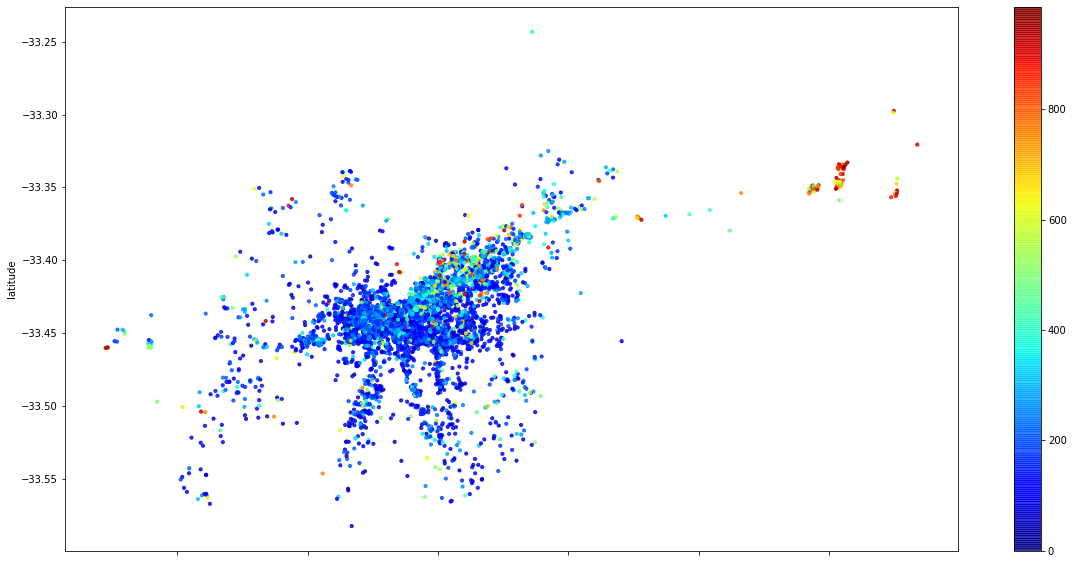

In [108]:
# Gráfico com os imóveis pela latitude-longitude
dfSantiago.plot(kind='scatter', x='longitude', y='latitude', alpha=0.8, c=dfSantiago['price'], s=10, cmap=plt.get_cmap('jet'), figsize=(20, 10));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [121]:
# Média da coluna `minimum_nights``
print("{} Noites".format(round(dfSantiago['minimum_nights'].mean())))

4 Noites


### **Criando o Mapa com os Bairros de Santiago**

Criamos abaixo um mapa interarivo que permite a visualização dos tipos de terrenos, os limites dos bairros e as médias de preços de cada distrito, concluindo as informações desta análise.  Ainda permite a mudançaficientes para auxiliar o turista que deseja conhecer Florença: média de preço da cidade e de cada distrito, número de espaços disponíveis para cada tipo de quarto e suas respectivas médias de preço. Ainda assim, facilitará muito a tomada de decisão desse turista saber exatamente onde estão os imóveis mais baratos e mais caros através de um mapa.

Abaixo está um mapa interativo com a marcação de cada imóvel anunciado. Os círculos amarelos são os quartos cujo preço está até 10% acima ou abaixo da média da cidade; os círculos verdes e vermelhos, por sua vez, são os quartos cujo preço está abaixo ou acima dessa faixa. Ao clicar nos círculos, o preço do imóvel correspondente será mostrado num popup.

In [109]:
# Importando o Mapa
Santiago_geo = gpd.read_file('https://raw.githubusercontent.com/jlhonora/geo/master/santiago.geojson')

In [111]:
# Visualizando alguns registros
Santiago_geo.head()

,CIR_SENA,COD_COMUNA,DIS_ELEC,NOM_COM,NOM_PROV,NOM_REG,SHAPE_Area,SHAPE_LENG,SHAPE_Le_1,geometry
0,7,1310,19,Independencia,Santiago,Región Metropolitana de Santiago,7.514746e+06,11488.695747,11718.687086,"POLYGON ((-70.65730 -33.40478, -70.65729 -33.4..."
1,8,1311,26,La Florida,Santiago,Región Metropolitana de Santiago,7.103733e+07,49696.426792,49621.402174,"POLYGON ((-70.43946 -33.49206, -70.43825 -33.4..."
2,8,1311,23,Lo Barnechea,Santiago,Región Metropolitana de Santiago,1.024735e+09,149539.074262,149865.511039,"POLYGON ((-70.47723 -33.36950, -70.47593 -33.3..."
3,8,1311,28,Lo Espejo,Santiago,Región Metropolitana de Santiago,8.181655e+06,11405.976038,11389.045242,"POLYGON ((-70.69410 -33.50243, -70.69268 -33.5..."
4,7,1311,18,Lo Prado,Santiago,Región Metropolitana de Santiago,6.535088e+06,10795.433315,10691.672490,"POLYGON ((-70.70559 -33.45716, -70.70620 -33.4..."


In [113]:
# Contando os valores unicos da coluna 'NOM_COM' do dataset Santiago (json)
Santiago_geo['NOM_COM'].nunique()

32

In [114]:
# Contando os valores unicos do dataset Santiago
dfSantiago['neighbourhood'].nunique()

30

In [115]:
# Mostrados os bairros do dataset Santiago (json)
Santiago_geo['NOM_COM'].unique()

array(['Independencia', 'La Florida', 'Lo Barnechea', 'Lo Espejo',
       'Lo Prado', 'Pedro Aguirre Cerda', 'Pudahuel', 'San Joaquín',
       'San Ramón', 'Cerrillos', 'Cerro Navia', 'Conchalí', 'El Bosque',
       'Peñalolén', 'Providencia', 'Quilicura', 'Vitacura',
       'Quinta Normal', 'Recoleta', 'Renca', 'San Miguel', 'Santiago',
       'Huechuraba', 'La Cisterna', 'La Granja', 'La Pintana', 'La Reina',
       'Las Condes', 'Macul', 'Maipú', 'Ñuñoa', 'Estación Central'],
      dtype=object)

In [116]:
# Mostrados os bairros do dataset Santiago
dfSantiago['neighbourhood'].unique()

array(['Providencia', 'Lo Barnechea', 'Recoleta', 'Santiago',
       'La Florida', 'Las Condes', 'Ñuñoa', 'La Reina', 'Independencia',
       'San Miguel', 'Maipú', 'Vitacura', 'Macul', 'Estación Central',
       'Pedro Aguirre Cerda', 'Pudahuel', 'Quinta Normal', 'San Joaquín',
       'Peñalolén', 'El Bosque', 'Lo Espejo', 'La Cisterna', 'Lo Prado',
       'Huechuraba', 'Renca', 'Quilicura', 'Conchalí', 'Cerrillos',
       'La Granja', 'Cerro Navia'], dtype=object)

In [117]:
# Excluindo os bairros que não pertencem ao dataset dfSantiago (San Ramon, La Pintana)
Santiago_geo.drop(Santiago_geo[Santiago_geo.NOM_COM == 'San Ramón'].index, axis=0, inplace=True)
Santiago_geo.drop(Santiago_geo[Santiago_geo.NOM_COM == 'La Pintana'].index, axis=0, inplace=True)

In [118]:
# Mostrados os bairros do dataset Santiago (json)
Santiago_geo['NOM_COM'].unique()

array(['Independencia', 'La Florida', 'Lo Barnechea', 'Lo Espejo',
       'Lo Prado', 'Pedro Aguirre Cerda', 'Pudahuel', 'San Joaquín',
       'Cerrillos', 'Cerro Navia', 'Conchalí', 'El Bosque', 'Peñalolén',
       'Providencia', 'Quilicura', 'Vitacura', 'Quinta Normal',
       'Recoleta', 'Renca', 'San Miguel', 'Santiago', 'Huechuraba',
       'La Cisterna', 'La Granja', 'La Reina', 'Las Condes', 'Macul',
       'Maipú', 'Ñuñoa', 'Estación Central'], dtype=object)

Criamos abaixo um mapa interarivo que permite a visualização dos tipos de terrenos, os limites dos bairros e as médias de preços de cada distrito, concluindo as informações desta análise. Ao clicar nos círculos, o preço do imóvel correspondente será mostrado num popup.

In [130]:
# Criando o mapa interativo com os bairros de Santiago
Santiago_mapa = folium.Map(location=[-33.44880082708802, -70.65432167291549], zoom_start=9, tiles='openstreetmap')

# Inserindo os limetes dos bairros
folium.GeoJson(Santiago_geo, name='Limites').add_to(Santiago_mapa)

# Adicionar as camadas coms tipos de terrenos
tiles = ['stamenwatercolor','cartodbpositron','Stamen Toner','stamenterrain']
for tile in tiles:
    folium.TileLayer(tile).add_to(Santiago_mapa)

# Criar o choropleth com as médias por bairro 
choropleth = folium.Choropleth(
    geo_data=Santiago_geo,
    name='Choropleth',
    data=bairros_caros,
    columns=['neighbourhood', 'price'],
    key_on='feature.properties.NOM_COM',
    fill_color='OrRd', 
    fill_opacity=1, 
    line_opacity=1,
    legend_name='Média de Preços dos Imóveis por Bairro',
    highlight=True,
    smooth_factor=0).add_to(Santiago_mapa)

# Adicionar os nomes dos bairros ao passar o mouse
style_function = "font-size: 15px; font-weight: bold"
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(
        fields=['NOM_COM'],
        style=style_function,
        labels=False).add_to(Santiago_mapa))


# Adicionar o menu de controle
folium.LayerControl().add_to(Santiago_mapa)

# Mostar o mapa
Santiago_mapa

## Conclusões


Mesmo sendo uma versão resumida do conjuto de dados, podemos obter algumas informações com o preço médio dos imóveis, a quantiade de imóveis por tipo de quarto, a distribuição dos imóveis entre os diversos bairros de Santiago. Ainda mais informações podem ser obtidas com a análise do conjunto de dados completo.